## Scientific Computation Lab 4

In this lab, you will modify graph search functions so that they find shortest paths and identify connected components in graphs provided as input. You will also be asked to analyze the theoretical costs of the resulting codes.

### Task 1: Shortest paths from BFS

The BFS code developed in lecture finds all reachable nodes from a source and computes the distance of the shortest path from the source to each reachable node:

In [ ]:
import networkx as nx

def bfs(G,s):
    """
    Input:
    G: networkx graph
    x: source node

    Output:
    L2: Labels for all nodes in graph, 0=unreachable from source, 1=reachable
    L3: Shortest distance from source to nodes in graph
    """

    L1 = list(G.nodes) #Assumes nodes are numbered from 0 to N-1
    L2 = [0 for l in L1] #Labels
    L3 = [-1000 for l in L1] #Distances
    L4 = [[] for l in L1] #Paths 
    Q=[]
    Q.append(s)
    L2[s]=1
    L3[s]=0
    L4[s] = [s]
    while len(Q)>0:
        x = Q.pop(0) #remove node from front of queue
        print("***x=",x,' ***')
        for v in G.adj[x]:
            if L2[v]==0:
                Q.append(v) #add unexplored neighbors to back of queue
                L2[v]=1
                L3[v]=1+L3[x]
                #add code here
            
            print("v=",v)
            print("Q=",Q)
    return L2,L3

1. Modify the function above so that it returns a list, L4, constructed so that L4[i] contains a list of nodes for a shortest path between the source and node $i$. For example, L4=[[0],[0,2,3,1],[0,2],[0,3]] would indicate that a shortest path between nodes $0$ and $1$ is $0\rightarrow 2 \rightarrow 3 \rightarrow 1$. 

In [7]:
#New function here
import networkx as nx

def bfs(G,s):
    """
    Input:
    G: networkx graph
    x: source node

    Output:
    L2: Labels for all nodes in graph, 0=unreachable from source, 1=reachable
    L3: Shortest distance from source to nodes in graph
    """

    L1 = list(G.nodes) #Assumes nodes are numbered from 0 to N-1
    L2 = [0 for l in L1] #Labels
    L3 = [-1000 for l in L1] #Distances
    L4 = [[] for l in L1] #Paths 
    Q=[]
    Q.append(s)
    L2[s]=1
    L3[s]=0
    L4[s] = [s]
    while len(Q)>0:
        x = Q.pop(0) #remove node from front of queue
        print("***x=",x,' ***')
        for v in G.adj[x]:
            if L2[v]==0:
                Q.append(v) #add unexplored neighbors to back of queue
                L2[v]=1
                L3[v]=1+L3[x]
                #add code here
                L4[v].extend(L4[x]) #Add path to node x and node v to path
                L4[v].append(v)     #for node v           
            print("v=",v)
            print("Q=",Q)
    return L2,L3,L4


2. Test your function with the Barabasi-Albert graph generated below and verify (using networkx) that it computes shortest-paths correctly. Note that G is created using a random graph model, and a different graph should be generated each time nx.barabasi_albert_graph is called.

In [11]:
G = nx.barabasi_albert_graph(10,3)
#Add code here
L2,L3,L4 = bfs(G,0)
D4 = nx.shortest_path(G,0)  
print("bfs result:",L4)
print("nx result:", D4) #note that there may be more than one shortest path
                        #between two nodes


***x= 0  ***
v= 1
Q= [1]
v= 2
Q= [1, 2]
v= 3
Q= [1, 2, 3]
v= 4
Q= [1, 2, 3, 4]
v= 6
Q= [1, 2, 3, 4, 6]
v= 7
Q= [1, 2, 3, 4, 6, 7]
v= 8
Q= [1, 2, 3, 4, 6, 7, 8]
***x= 1  ***
v= 0
Q= [2, 3, 4, 6, 7, 8]
v= 4
Q= [2, 3, 4, 6, 7, 8]
v= 5
Q= [2, 3, 4, 6, 7, 8, 5]
v= 8
Q= [2, 3, 4, 6, 7, 8, 5]
***x= 2  ***
v= 0
Q= [3, 4, 6, 7, 8, 5]
v= 4
Q= [3, 4, 6, 7, 8, 5]
v= 5
Q= [3, 4, 6, 7, 8, 5]
v= 7
Q= [3, 4, 6, 7, 8, 5]
v= 8
Q= [3, 4, 6, 7, 8, 5]
v= 9
Q= [3, 4, 6, 7, 8, 5, 9]
***x= 3  ***
v= 0
Q= [4, 6, 7, 8, 5, 9]
v= 5
Q= [4, 6, 7, 8, 5, 9]
v= 6
Q= [4, 6, 7, 8, 5, 9]
v= 9
Q= [4, 6, 7, 8, 5, 9]
***x= 4  ***
v= 0
Q= [6, 7, 8, 5, 9]
v= 1
Q= [6, 7, 8, 5, 9]
v= 2
Q= [6, 7, 8, 5, 9]
v= 6
Q= [6, 7, 8, 5, 9]
***x= 6  ***
v= 0
Q= [7, 8, 5, 9]
v= 3
Q= [7, 8, 5, 9]
v= 4
Q= [7, 8, 5, 9]
***x= 7  ***
v= 0
Q= [8, 5, 9]
v= 2
Q= [8, 5, 9]
v= 5
Q= [8, 5, 9]
v= 9
Q= [8, 5, 9]
***x= 8  ***
v= 0
Q= [5, 9]
v= 1
Q= [5, 9]
v= 2
Q= [5, 9]
***x= 5  ***
v= 1
Q= [9]
v= 2
Q= [9]
v= 3
Q= [9]
v= 7
Q= [9]
***x= 9  ***
v= 2
Q= []
v

3. Say that the maximum distance in the graph is $d_{max}$. Use $d_{max}$ to construct an estimate the big-O cost of computing the paths. 

The cost of constructing the shortest path for node $i$ is $O(d_{si})$ where $d_{si}$ is the distance between $i$ and the source node. So, we can say that the cost of computing all paths is $O(N d_{max})$. For large complex networks, this maximum distance (the graph "diameter") increases logarithmically with $N$. 

### Task 2: Connected components

A connected component of a graph is a (maximal) subset of nodes where there is at least one path between any pair of nodes in the subset. A graph may contain several connected components, and the aim of this task is to assign a distinct numerical label to all nodes belonging to the same component. So, if a graph with 5 nodes has links: 0-1, 1-2, 3-4, then nodes 0,1,2 would be labeled belonging to component "0" and nodes 3,4 would be assigned to component "1". 

The basic algorithm is as follows:

* Initialize numerical label to 0
* Loop through all nodes in graph
    * if current node has not been explored
        * Assign numerical label to current node and label it as explored
        * Find all nodes reachable from current node, label them as explored and assign numerical label to them
        * Increment numerical label



1. Implement this algorithm in the cell below so that it takes a networkx graph as input and creates a list, Lconnect, where Lconnect[i] is the label for the connected component that node $i$ belongs to. You may assume that nodes have 
been numbered from 0 to N-1. You have been provided with a function that implements depth-first search.

In [3]:
import networkx as nx

def dfs(G,s,L2,label):
    """
    Input:
    G: networkx graph
    s: source node
    L2: labels for reachable nodes, used in conjunction with connect below
    label: label of "current" component as set by connect
    Find reachable nodes using DFS
    Output:
    L2: Labels for all nodes in graph, -1=unreachable from source, label=reachable
    """

    Q=[]
    Q.append(s)
    L2[s]=label

    while len(Q)>0:
        x = Q.pop()
        for v in G.adj[x].keys():
            if L2[v]==-1:
                Q.append(v)
                L2[v]=label
            #print("v=",v)
            #print("Q=",Q)
    return L2

def connect(G):
    """Find connected components of G and label nodes appropriately
    in list, Lconnect.
    """
    Lconnect = [-1 for n in G.nodes()]
    label=0
    #Add code here
    for i in G.nodes():
        if Lconnect[i]==-1:
            Lconnect = dfs(G,i,Lconnect,label)
            label = label+1

    return Lconnect

2. Use the random graph generated below to verify that your code is correct. What is the asymptotic time complexity of your routine? 

Lconnect= [0, 0, 0, 1, 1, 0, 0, 0, 1, 1]


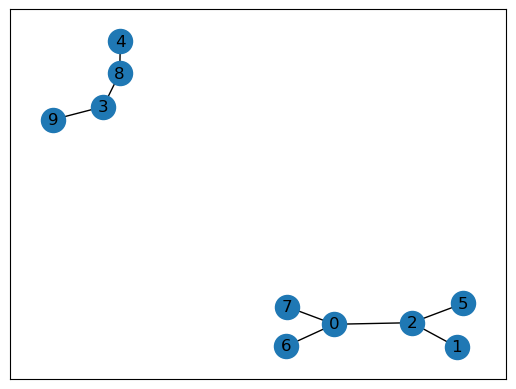

In [13]:
G = nx.erdos_renyi_graph(10,0.1)
#Add code here
nx.draw_networkx(G,with_labels=True)
Lconnect = connect(G)
print("Lconnect=",Lconnect)

DFS has been modified above for use with *connect*, however its cost remains $\mathcal{O}(N_c+L_c)$ where $N_c$ and $L_c$ are the number of nodes and links in a connected component . DFS is called once per connected component, so the total cost is $\mathcal{O}(N+L)$.